In [1]:
import os
print("The current working directory is: ", os.getcwd())

The current working directory is:  c:\Users\Malay Singh Bisht\Documents\DATA WITH CONDA


In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# %matplotlib inline ensures plots are displayed in the notebook
%matplotlib inline

# Load the dataset
csv_file_path = 'Stock_Prices_MasterCard_Visa_2008_2024.csv'
df = pd.read_csv(csv_file_path)

In [3]:

# Inspect the data
print(df.head())

         Date     Open_M     High_M      Low_M    Close_M  Adj Close_M  \
0  02-06-2008  30.926001  32.000000  30.257000  32.000000    29.529486   
1  03-06-2008  31.386999  31.399000  30.235001  30.740000    28.366755   
2  04-06-2008  30.745001  30.959999  29.454000  29.740000    27.443956   
3  05-06-2008  29.951000  30.615999  29.544001  30.615999    28.252338   
4  06-06-2008  30.228001  30.242001  29.481001  29.573000    27.289856   

   Volume_M     Open_V     High_V      Low_V    Close_V  Adj Close_V  Volume_V  
0  50620000  21.552500  21.737499  21.150000  21.517500    19.202324  36856000  
1  93913000  21.752501  21.987499  21.507500  21.889999    19.534735  48411600  
2  66160000  21.770000  22.025000  21.320000  21.370001    19.070698  40684400  
3  45959000  21.615000  21.809999  21.397499  21.809999    19.463354  27059600  
4  29383000  21.475000  21.497499  20.887501  20.912500    18.662413  41748000  


In [4]:

# Convert 'Date' column to datetime format with the correct format
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')

# Check for missing values
print(df.isnull().sum())

Date           0
Open_M         0
High_M         0
Low_M          0
Close_M        0
Adj Close_M    0
Volume_M       0
Open_V         0
High_V         0
Low_V          0
Close_V        0
Adj Close_V    0
Volume_V       0
dtype: int64


In [5]:

# Handle missing data (if any)
df.fillna(method='ffill', inplace=True)

# Separate data for MasterCard and Visa
df_mc = df[['Date', 'Open_M', 'High_M', 'Low_M', 'Close_M', 'Adj Close_M', 'Volume_M']].copy()
df_visa = df[['Date', 'Open_V', 'High_V', 'Low_V', 'Close_V', 'Adj Close_V', 'Volume_V']].copy()

# Rename columns for consistency
df_mc.columns = ['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']
df_visa.columns = ['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']


C:\Users\Malay Singh Bisht\AppData\Local\Temp\ipykernel_38372\3500594645.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


In [6]:

# Set 'Date' as the index
df_mc.set_index('Date', inplace=True)
df_visa.set_index('Date', inplace=True)

# Calculate moving averages
df_mc['MA20'] = df_mc['Close'].rolling(window=20).mean()
df_mc['MA50'] = df_mc['Close'].rolling(window=50).mean()

df_visa['MA20'] = df_visa['Close'].rolling(window=20).mean()
df_visa['MA50'] = df_visa['Close'].rolling(window=50).mean()


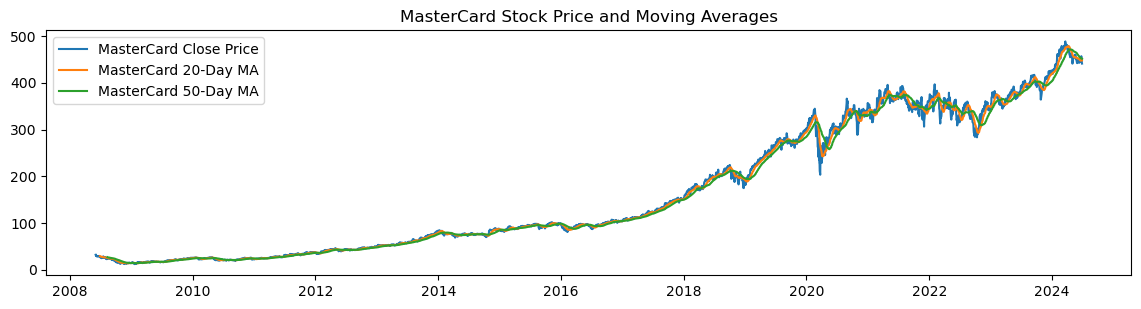

In [8]:
# Plot stock price trends
plt.figure(figsize=(14, 7))
plt.subplot(2, 1, 1)
plt.plot(df_mc['Close'], label='MasterCard Close Price')
plt.plot(df_mc['MA20'], label='MasterCard 20-Day MA')
plt.plot(df_mc['MA50'], label='MasterCard 50-Day MA')
plt.title('MasterCard Stock Price and Moving Averages')
plt.legend()


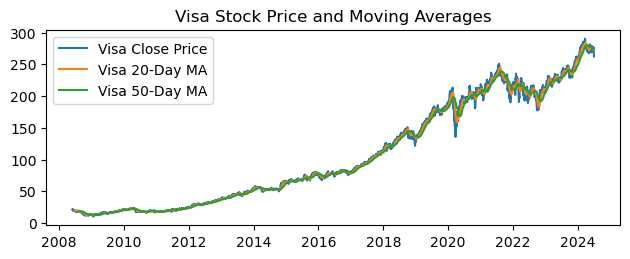

In [11]:
plt.subplot(2, 1, 2)
plt.plot(df_visa['Close'], label='Visa Close Price')
plt.plot(df_visa['MA20'], label='Visa 20-Day MA')
plt.plot(df_visa['MA50'], label='Visa 50-Day MA')
plt.title('Visa Stock Price and Moving Averages')
plt.legend()

plt.tight_layout()
plt.show()